In [1]:
import networkx as nx
import numpy as np
import math
import timeit

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Create an empty Undirected Plane Graph (UPG)
upg = nx.Graph()

In [4]:
# Node names
nodes_name = {1:'Andhra Pradesh', 2:'Arunachal Pradesh', 3:'Assam', 4:'Bihar', 5:'Chhattisgarh', 6:'Goa', 7:'Gujarat',
              8:'Haryana', 9:'Himachal Pradesh', 10:'Jharkhand', 11:'Karnataka', 12:'Kerala', 13:'Madhya Pradesh', 14:'Maharashtra'}

# Add nodes
upg.add_nodes_from(nodes_name.keys())

In [5]:
# Add weighted edges
edges_list = [(1, 2), (1, 3), (1, 4), (1, 10), (1, 13), (2, 3), (2, 4), (2, 10), (2, 11), (3, 5), (3, 7), (3, 8), (3, 10), 
              (3, 11), (3, 12), (3, 13), (3, 14), (4, 11), (5, 6), (5, 9), (5, 11), (5, 14), (6, 11), (7, 12), (7, 14), (8, 12)]
upg.add_edges_from(edges_list)
edges_list

[(1, 2),
 (1, 3),
 (1, 4),
 (1, 10),
 (1, 13),
 (2, 3),
 (2, 4),
 (2, 10),
 (2, 11),
 (3, 5),
 (3, 7),
 (3, 8),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (4, 11),
 (5, 6),
 (5, 9),
 (5, 11),
 (5, 14),
 (6, 11),
 (7, 12),
 (7, 14),
 (8, 12)]

In [6]:
# Function to color graphs using the Welsh-Powell algorithm
def graph_coloring_welsh_powell(g, verbose=False):
    start_time = timeit.default_timer()
    
    colors = dict()
    vtx_degree = dict()
    palette = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]
    
    # Find the degree of each vertex
    for v in g.nodes():
        vtx_degree[v] = len(list(g.neighbors(v)))
    
    # List the vertices in order of descending degree
    vtx_sort = [k for k in sorted(vtx_degree, key=vtx_degree.get, reverse=True)]
    if verbose:
        print(vtx_sort)
    
    # Colour the vertices in the list
    c_ix = -1
    while len(vtx_sort) > 0 and c_ix < len(palette):
        c_ix += 1
        if verbose:
            print(' current color:', palette[c_ix], ', n vertices:', len(vtx_sort))
        
        # Go down the sorted list and color every vertex not connected to the colored vertices
        colored_nodes = []
        for v in vtx_sort:
            if len(set(g.neighbors(v)).intersection(set(colored_nodes))) == 0:
                colors[v] = palette[c_ix]
                colored_nodes.append(v)
                
                if verbose:
                    print('  ', v, '->', palette[c_ix], '->', list(g.neighbors(v)))
        
        # Remove colored nodes
        for v in colored_nodes:
            if v in vtx_sort:
                vtx_sort.remove(v)
    
    # Elapsed time
    if verbose:
        elapsed = (timeit.default_timer() - start_time) * 1000
        print(' the chromatic number is:', (c_ix + 1))
        print('>> elapsed time', elapsed, 'ms')
        
    return colors

In [7]:
# Get colors by vertices
vtx_colors = graph_coloring_welsh_powell(upg, True)

[3, 1, 2, 5, 11, 4, 7, 10, 12, 14, 6, 8, 13, 9]
 current color: #1f77b4 , n vertices: 14
   3 -> #1f77b4 -> [1, 2, 5, 7, 8, 10, 11, 12, 13, 14]
   4 -> #1f77b4 -> [1, 2, 11]
   6 -> #1f77b4 -> [5, 11]
   9 -> #1f77b4 -> [5]
 current color: #ff7f0e , n vertices: 10
   1 -> #ff7f0e -> [2, 3, 4, 10, 13]
   5 -> #ff7f0e -> [3, 6, 9, 11, 14]
   7 -> #ff7f0e -> [3, 12, 14]
   8 -> #ff7f0e -> [3, 12]
 current color: #2ca02c , n vertices: 6
   2 -> #2ca02c -> [1, 3, 4, 10, 11]
   12 -> #2ca02c -> [3, 7, 8]
   14 -> #2ca02c -> [3, 5, 7]
   13 -> #2ca02c -> [1, 3]
 current color: #d62728 , n vertices: 2
   11 -> #d62728 -> [2, 3, 4, 5, 6]
   10 -> #d62728 -> [1, 2, 3]
 the chromatic number is: 4
>> elapsed time 19.866499991621822 ms


In [9]:
# We then set the coordinates of each node
upg.nodes[1]['pos']  = (3,-4)
upg.nodes[2]['pos']  = (3,-1)
upg.nodes[3]['pos']  = (5, 1)
upg.nodes[4]['pos']  = (2,-2)
upg.nodes[5]['pos']  = (1, 3)
upg.nodes[6]['pos']  = (0, 1.5)
upg.nodes[7]['pos']  = (4, 2.5)
upg.nodes[8]['pos']  = (6, 2)
upg.nodes[9]['pos']  = (0, 4)
upg.nodes[10]['pos'] = (4,-2)
upg.nodes[11]['pos'] = (1, 0)
upg.nodes[12]['pos'] = (5, 2)
upg.nodes[13]['pos'] = (4.5,-3)
upg.nodes[14]['pos'] = (3, 3)

# The positions of each node are stored in a dictionary
pos = nx.get_node_attributes(upg, 'pos')

In [10]:
# Size of Indian states countries (k-km2)
nodes_size = {'Andhra Pradesh': 2780, 'Arunachal Pradesh': 1099, 'Assam': 8511, 'Bihar': 757, 'Chhattisgarh': 1142, 'Goa': 284, 'Gujarat': 215,
              'Haryana': 83, 'Himachal Pradesh': 75, 'Jharkhand': 407, 'Karnataka': 1285, 'Kerala': 164, 'Madhya Pradesh': 176, 'Maharashtra': 916}

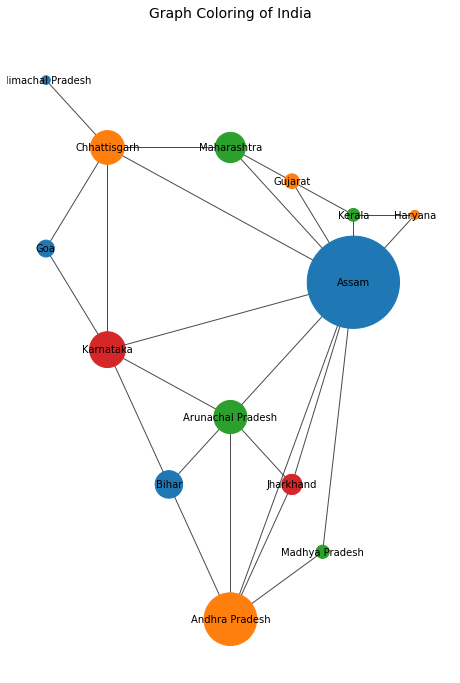

In [11]:
# Nodes labels
node_colors = []
for n in upg.nodes():
    node_colors.append(vtx_colors[n])

# Plot Directed Weighted Graph
plt.rcParams["figure.figsize"] = [8, 12]
nx.draw_networkx_nodes(upg, pos, nodelist=upg.nodes(), node_color=node_colors, node_size=list(nodes_size.values()), alpha=1)
nx.draw_networkx_edges(upg, pos, edgelist=upg.edges(), width=1, alpha=0.7, edge_color='black')
nx.draw_networkx_labels(upg, pos, nodes_name, font_size=10, font_color='black')
plt.title('Graph Coloring of India', fontsize=14)
plt.axis('off')
plt.show()